In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import pickle
import seaborn as sns
import skimage

import analyze
import evaluate
import characterize

In [2]:
with open('../data/interim/instance_sets/particle_gt_instance_sets.pickle', 'rb') as f:
    particle_gt_instances = pickle.load(f)
with open('../data/interim/instance_sets/satellite_gt_instance_sets.pickle', 'rb') as f:
    satellite_gt_instances = pickle.load(f)

with open('../data/interim/instance_sets/particle_pred_instance_sets.pickle', 'rb') as f:
    particle_pred_instances = pickle.load(f)    
with open('../data/interim/instance_sets/satellite_pred_instance_sets.pickle', 'rb') as f:
    satellite_pred_instances = pickle.load(f)

In [16]:
for group in [particle_pred_instances, satellite_pred_instances]: # fix for filepaths stored as tuples, TODO remove after bug fix
    for instance in group:
        instance.filepath = instance.filename[0]

Sc1Tile_001-001-000_0-000.png
Sc1Tile_001-002-000_0-000.png
Sc2Tile_001-001-000_0-000.png
Sc3Tile_008-007-000_0-000.png
Sc2Tile_010-006-000_0-000.png
Sc1Tile_001-001-000_0-000.png
Sc1Tile_001-002-000_0-000.png
Sc2Tile_001-001-000_0-000.png
Sc3Tile_008-007-000_0-000.png
Sc4Tile_002-008-000_0-000.png
Sc4Tile_008-004-000_0-000.png
Sc1Tile_008-006-000_0-000.png
Sc2Tile_003-001-000_0-000.png
Sc2Tile_010-006-000_0-000.png
Sc3Tile_010-001-000_0-000.png


In [17]:
def instance_pair_matcher(A, B):
    """
    matches instance lists A and B based on their filenames
    """
    
    Bdict = {pathlib.Path(item.filepath).name : item for item in B}
    
    A_matched = []
    B_matched = []
    for item in A:
        x = Bdict.get(pathlib.Path(item.filepath).name, None)
        if x is not None:
            A_matched.append(item)
            B_matched.append(x)
    return A_matched, B_matched
    

In [19]:
# only keep gt satellites with corresponding particle masks drawn
particle_gt_matched, satellite_gt_matched = instance_pair_matcher(particle_gt_instances, satellite_gt_instances)
# makes sure order of particle predictions is same as particle gt
particle_gt_matched, particle_pred_matched = instance_pair_matcher(particle_gt_matched, particle_pred_instances)
# only keep pred instances with corresponding satellites
particle_pred_matched, satellite_pred_matched = instance_pair_matcher(particle_pred_matched, satellite_pred_instances)

In [20]:
for gt, pred in zip(particle_gt_matched, particle_pred_matched):
    pred.img = gt.img

In [31]:
val_mask = [x.dataset_type=='Validation' for x in particle_gt_matched]

particle_gt_val = [x for x, b in zip(particle_gt_matched, val_mask) if b][0]
satellite_gt_val =[x for x, b in zip(satellite_gt_matched, val_mask) if b][0]
particle_pred_val = [x for x, b in zip(particle_pred_matched, val_mask) if b][0]
satellite_pred_val = [x for x, b in zip(satellite_pred_matched, val_mask) if b][0]


In [35]:
psi_gt = characterize.powder_satellite_image(particle_gt_val, satellite_gt_val)
psi_pred = characterize.powder_satellite_image(particle_pred_val, satellite_gt_val)

psi_gt.compute_matches()
psi_pred.compute_matches()

for x in [psi_gt, psi_pred]:
    for y in [x.particles, x.satellites]:
        y.boxes =y.boxes.astype(np.int)

In [37]:
psi_gt.matches['particle_satellite_match_idx'].keys()

dict_keys([0, 8, 77, 74, 3, 73, 21, 19, 23, 53, 42, 50, 57, 37, 40, 34, 20, 2, 31, 63, 102, 105, 130, 128, 126, 123, 127, 175, 170, 191, 154, 155, 114, 95, 78, 136, 228, 220, 223, 232, 147, 176, 199, 203, 213, 217, 231, 187, 209, 178, 140, 221, 134, 177, 151])

Text(0.5, 1.0, 'predicted')

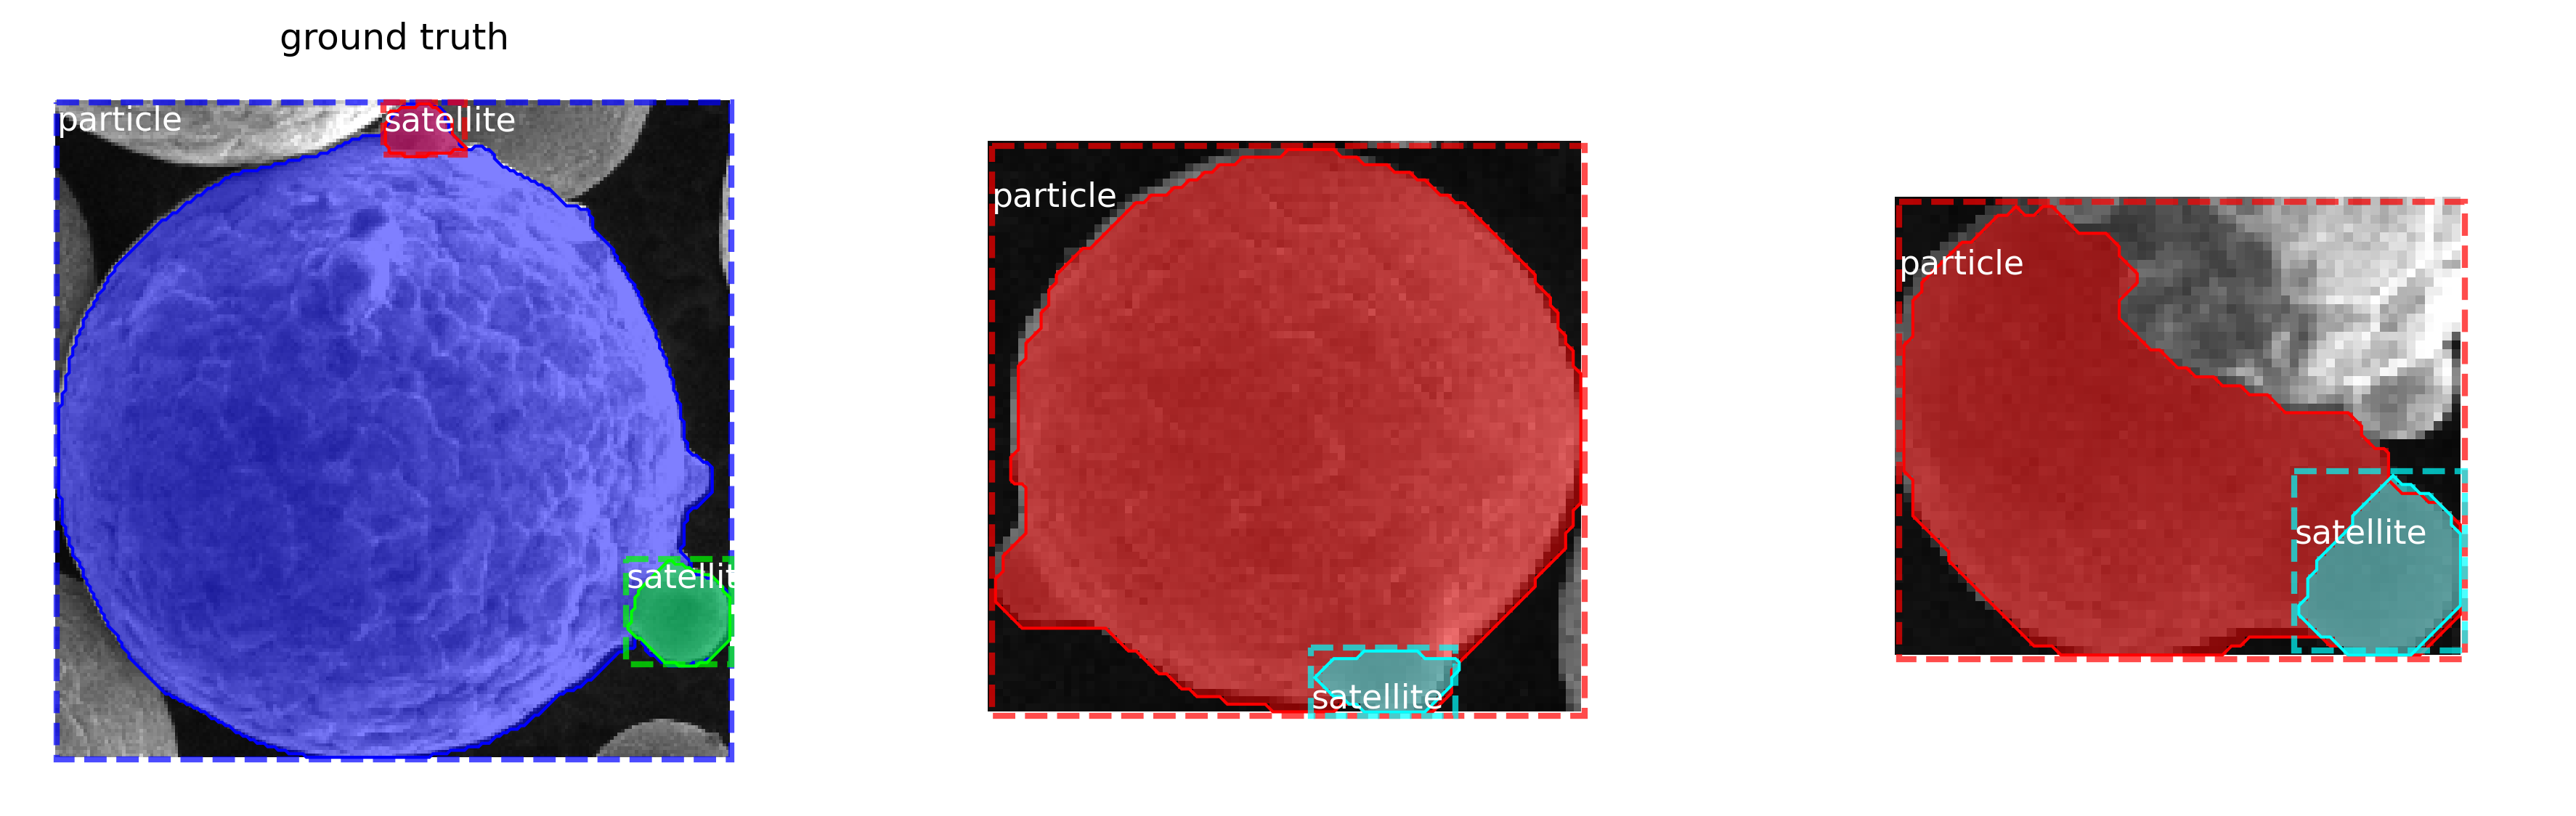

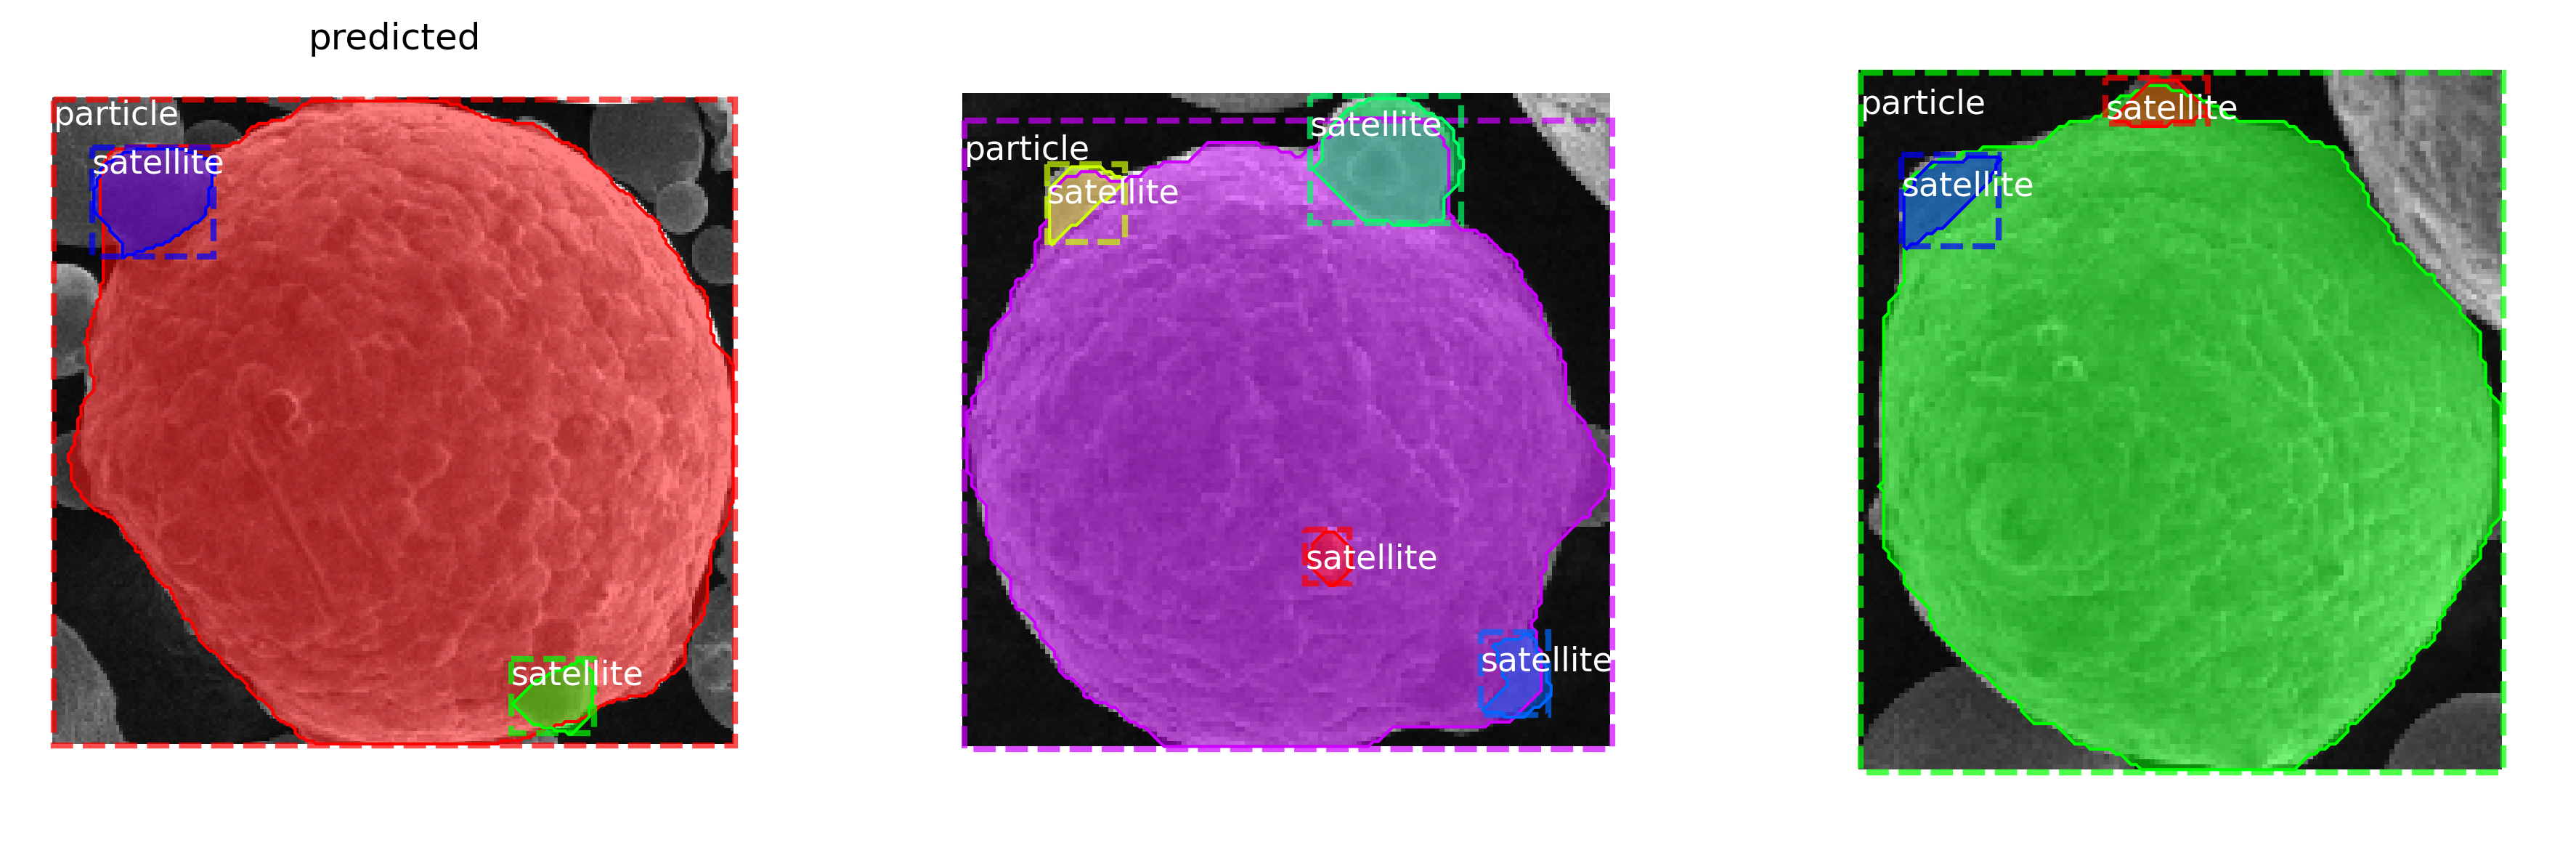

In [39]:
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=300)
for i, a in zip(np.random.choice(list(psi_gt.matches['particle_satellite_match_idx'].keys()), size=3, replace=False),
                 ax.ravel()):
    psi_gt.visualize_particle_with_satellites(i, a)
ax[0].set_title('ground truth')    
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=300)
for i, a in zip(np.random.choice(list(psi_pred.matches['particle_satellite_match_idx'].keys()), size=3, replace=False),
                 ax.ravel()):
    psi_pred.visualize_particle_with_satellites(i, a)
ax[0].set_title('predicted')

In [54]:
gt_n = psi_gt.matches['particles_matched'].shape[0]
pred_n = psi_pred.matches['particles_matched'].shape[0]
print('Number of particles with satellites:\n\tgt: {}\n\tpred: {}\n\tratio: {:.3f}'.format(gt_n, pred_n, pred_n/gt_n))

Number of particles with satellites:
	gt: 55
	pred: 51
	ratio: 0.927


In [58]:
psi_gt.matches['satellite_matches'].shape[0] ,psi_pred.matches['satellite_matches'].shape[0]

(88, 82)